In [1]:
import pandas as pd
import networkx as nx
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
from pylab import rcParams
from collections import Counter
import pygraphviz as pgv
from pyvis.network import Network
from matplotlib.pyplot import figure
from IPython.display import display

In [2]:
years = range(1990,2022)
for y in years:
    locals()['Gorg' + str(y)] = nx.read_gpickle(r'C:\Users\Marco\Documents\GitHub\crunch_net\ANS\ANS_all\orgorg4\orgorg4_single' +
                                               str(y) +
                                               '.gpickle')
    print(y)

1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021


In [3]:
years = range(1994,2021)
for y in years:
    locals()['Gbid' + str(y)] = nx.read_gpickle(r'C:\Users\Marco\Documents\GitHub\crunch_net\ANS\ANS_all\bidbid_stage_self_single\bidbid_stage_self_single_' +
                                               str(y) +
                                               '.gpickle')
    print(y)

1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020


In [5]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

def hypergeom_pmf(N, A, n, x):
    
    '''
    Probability Mass Function for Hypergeometric Distribution
    :param N: population size
    :param A: total number of desired items in N
    :param n: number of draws made from N
    :param x: number of desired items in our draw of n items
    :returns: PMF computed at x
    '''
    Achoosex = comb(A,x)
    NAchoosenx = comb(N-A, n-x)
    Nchoosen = comb(N,n)
    
    return (Achoosex)*NAchoosenx/Nchoosen

In [6]:
def hypergeom_cdf(N, A, n, t, min_value=None):
    
    '''
    Cumulative Density Funtion for Hypergeometric Distribution
    :param N: population size
    :param A: total number of desired items in N
    :param n: number of draws made from N
    :param t: number of desired items in our draw of n items up to t
    :returns: CDF computed up to t
    '''
    if min_value:
        return np.sum([hypergeom_pmf(N, A, n, x) for x in range(min_value, t+1)])
    
    return np.sum([hypergeom_pmf(N, A, n, x) for x in range(t+1)])

In [7]:
def plot_degree_dist(G):
    hist = nx.degree_histogram(G)
    q = [w+1 for w in hist]
    q = np.log(q[1:])
    
    plt.subplot(7,3, y-2000)
    x = np.log(range(1, len(hist)))
    plt.plot(x, q, ".")
    plt.title(str(y))
    
    #plt.loglog()
    m, b = np.polyfit(x, q, 1)
    plt.plot(x, m*x + b)
    #print(y)
    #print(m)
    #print(' ')

In [8]:
def get_succ(status):
    if status == 'Acquired':
        return 1
    if status == 'Alive / Active':
        return 0
    if status == 'IPO / Went public':
        return 1
    if status == 'Merged':
        return 1
    else:
        return 0
    
    


In [ ]:
f, axs = plt.subplots(7,3,figsize=(15,15), sharex=True, sharey=True)

for y in range(2001,2022):
    plot_degree_dist(locals()['Gorg' + str(y)])
f.add_subplot(111, frameon=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.xlabel("Common X-Axis")
plt.ylabel("Common Y-Axis")
plt.show()

In [ ]:
orgs.columns

# Definizione Classica

In [9]:
cb1 = pd.read_csv('cb1.csv')
cb2 = pd.read_csv('cb2.csv')
cb3 = pd.read_csv('cb3.csv')
cb = cb1.append(cb2)
cb = cb.append(cb3)
cb.index = range(len(cb))
cb['date_my'] = (pd.to_datetime(cb['date'],format='%m/%d/%Y', errors='coerce')).dt.to_period('m')
cb['date_y'] = (pd.to_datetime(cb['date'],format='%m/%d/%Y', errors='coerce')).dt.to_period('y')

nodes_org = cb[['target_name', 'target_ID', 'target_country', 'target_continent', 'industry', 'target_founded']].drop_duplicates()
nodes_org['bipartite'] = 1
nodes_inv = cb[['investors_name', 'investor_id', 'investor_country', 'investor_continent', 'industry', 'investor_founded']].drop_duplicates()
nodes_org = nodes_org.rename(columns={"target_name": "node", "target_country": "country", 
                                      "target_continent": "continent", "industry":"industry",
                                     "target_ID":"index", 'target_founded':'foundation'})
nodes_inv = nodes_inv.rename(columns={"investors_name": "node","investor_country": "country", 
                                      "investor_continent": "continent", "investor_type":"industry","investor_id":'index', 'investor_founded':'foundation' })
nodes_inv['bipartite'] = 0
nodes = nodes_org.append(nodes_inv, ignore_index= True)
nodes['id'] = nodes.index

numbers = cb.groupby(['target_name','stage'], as_index = False).count()[['target_name','stage','investors_name']].rename(columns={"investors_name": "investor_numbers"})
cb_new = pd.merge(cb, numbers,  how='left', left_on=['target_name','stage'], right_on = ['target_name','stage'])
cb_new = pd.merge(cb_new, nodes[nodes['bipartite']== 1],  how='left', left_on=['target_name','target_ID'], right_on = ['node','index'])
cb_new = pd.merge(cb_new, nodes[nodes['bipartite']== 0],  how='left', left_on=['investors_name','investor_id'], right_on = ['node','index'])


In [10]:
def get_status(rounds):
    a = list()
    for i in rounds:
        indice = stage.index(i)
        a.append(stato[indice])
    return a
    
    


In [11]:
stati = cb_new.groupby('id_x')
stati2 = stati.tail(1).reset_index(drop=True)
stati3 = stati2[stati2["date"].notna()]

stati2[stati2["target_status"] == "Merged"].drop_duplicates()[["target_name","round_simp","target_status", "date"]]
fun_status = stati2[["round_simp", "target_status"]].groupby(['round_simp', "target_status"]).size().unstack(fill_value=0)[1:61]
fun_status.T.index.values

fun_status.mode()['Dead / Inactive']
stage = list(fun_status.idxmax(axis=1).index)
stage.append("Acq - P2P")

stato = list(fun_status.idxmax(axis=1))
stato.append("Acquired")

set(stato)
#robustness nel passare degli anni

{'Acquired',
 'Alive / Active',
 'Assets Purchased',
 'Dead / Inactive',
 'IPO / Went public',
 'Merged'}

In [228]:
get_status(['Dead'])

['Dead / Inactive']

In [28]:
df = cb_new
df['date_y']=df['date_y']
df = df[df['date_y']>0]
df = df[df['target_founded']>0]
ids = set(df['id_x'])

company = []
status_8 = []
for i in tqdm(ids):
    sub = df[df['id_x']== i][['id_x', 'date_y', 'round_simp','target_founded']]
    sub = sub[(sub['date_y']<=sub['target_founded'].values[0]+8) & (sub['target_founded'].values[0] < 2013)].tail(1)
    company.append(i)
    roun = sub['round_simp']
    status_8.append(get_status(roun))
    if i % 10000 == 0:
        print(i)
    
    
    
    

  0%|          | 0/22751 [00:00<?, ?it/s]

0
10000
20000
30000
40000
50000


In [29]:
stati_8 = [x[0] if len(x) >= 1 else 2 for x in status_8]

In [30]:
Counter(stati_8)

Counter({2: 15751,
         'Alive / Active': 5112,
         'Acquired': 1080,
         'IPO / Went public': 654,
         'Dead / Inactive': 60,
         'Merged': 61,
         'Assets Purchased': 33})

In [38]:
df_st8 = pd.DataFrame({'id' : company, 'st8' : stati_8})

### Most important

In [39]:
bidders = pd.read_csv(r'C:\Users\Marco\Documents\GitHub\crunch_net\ANS\ANS_all\Covariate_bidbid_final_final2.csv') # <-- relative path
orgs = pd.read_csv(r'C:\Users\Marco\Documents\GitHub\crunch_net\ANS\ANS_all\Covariates_orgorg_final2.csv') # <-- relative path


In [40]:
nodes = pd.read_csv(r'C:\Users\Marco\Documents\GitHub\crunch_net\ANS\ANS_all\nodes.csv') # <-- relative path
covariates = pd.read_csv(r'C:\Users\Marco\Documents\GitHub\crunch_net\ANS\ANS_all\covariates.csv')

In [41]:
bidders = pd.merge(bidders, nodes, on = 'id')
orgs = pd.merge(orgs,nodes, on = 'id')

In [42]:
orgs2 = pd.merge(orgs, covariates, on = 'id')

In [219]:
covariates.columns

Index(['Unnamed: 0', 'node', 'country', 'continent', 'industry', 'foundation',
       'sector', 'stage', 'first_money', 'date', 'current_sit', 'bipartite',
       'id', 'deg_max', 'deg_min', 'deg_median', 'voterank_max',
       'voterank_min', 'voterank_median', 'clustering_max', 'clustering_min',
       'clustering_median', 'harmonic_centrality_max',
       'harmonic_centrality_min', 'harmonic_centrality_median',
       'closeness_centrality_max', 'closeness_centrality_min',
       'closeness_centrality_median', 'newman_betweenness_centrality_max',
       'newman_betweenness_centrality_min',
       'newman_betweenness_centrality_median', 'pagerank_max', 'pagerank_min',
       'pagerank_median', 'betweenness_centrality_max',
       'betweenness_centrality_min', 'betweenness_centrality_median',
       'eigenvector_centrality_max', 'eigenvector_centrality_min',
       'eigenvector_centrality_median', 'average_neighbor_degree_max',
       'average_neighbor_degree_min', 'average_neighbor_d

In [43]:
bonav = covariates[covariates.date < covariates.foundation +3]

In [ ]:
df_st8 = pd.DataFrame({'id' : company, 'st8' : stati_8})

In [56]:
succ = []
for i in range(0, len(bonav)):
    succ.append(get_succ(bonav['current_sit'][i]))

TypeError: 'numpy.ndarray' object is not callable

In [72]:
outcome = list(set(bonav['current_sit']))
success = [get_succ(x) for x in outcome]

df_s = pd.DataFrame({'current_sit': outcome, 'success' : success})
bonav2 = pd.merge(bonav, df_s, on = 'current_sit')
bonav3 = pd.merge(bonav2, df_st8, on = 'id')

st8 = []
for i in tqdm(range(0,len(bonav3))):
    st8.append(get_succ(bonav3.iloc[i,:]['st8']))

  0%|          | 0/4307 [00:00<?, ?it/s]

In [71]:
for y in range(1995,2022):
    print(y, " ", len(bonav[bonav.foundation == y]))

1995   0
1996   1
1997   2
1998   49
1999   134
2000   229
2001   182
2002   152
2003   121
2004   151
2005   154
2006   160
2007   143
2008   111
2009   95
2010   118
2011   201
2012   220
2013   308
2014   457
2015   614
2016   461
2017   215
2018   14
2019   11
2020   4
2021   0


In [73]:
bonav3['succ8'] = st8

In [107]:
centralities = bonav.columns[13:]
i = -11
cent = centralities[i]
print(cent)

num_inv


In [108]:
b12 = bonav3[bonav3['foundation']<2013]
#b12 = b12[b12['first_money']<10000000]
b12 = b12[[cent, 'current_sit','success','stage', 'st8', 'succ8','first_money','id', 'node','st8','foundation']]
b12 = b12[b12[cent].notnull()]

In [109]:
for y in range(1995,2015):
    print(y, " ", len(b12[b12.foundation == y]))

1995   0
1996   1
1997   2
1998   49
1999   134
2000   229
2001   182
2002   152
2003   121
2004   151
2005   154
2006   160
2007   143
2008   111
2009   95
2010   118
2011   201
2012   220
2013   0
2014   0


In [ ]:
moves = []
p = []
N = len(b12)
A = sum(b12['succ8'])

for i in range(20,250):
    t = sum(b12.sort_values(ascending=True, by = cent)[0:i]['succ8'])
    moves.append(t/i)
    n = i
    p.append(hypergeom_cdf(N, A, n, t, min_value=None))

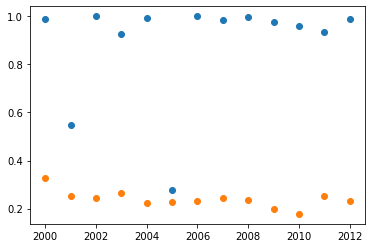

In [111]:
#FISSO AMPIEZZA SAMPLE, MUOVO ANNO FONDAZIONE

moves = []
p = []
N = len(b12)
A = sum(b12['succ8'])
ran = []
for i in range(2000,2013):
    n = 25
    N = len(b12[b12['foundation']==i])
    A = sum(b12[b12['foundation']==i]['succ8'])
    t = sum(b12[b12['foundation']==i].sort_values(ascending=False, by = cent)[0:n]['succ8'])
    moves.append(t/amp)
    p.append(hypergeom_cdf(N, A, n, t, min_value=None))
    ran.append(A/N)
plt.scatter(range(2000,2013), p)
plt.scatter(range(2000,2013), ran)
plt.show()

In [ ]:
centralities = [bonav.columns[i] for i in [8] + list(range(13,len(bonav.columns)))]
for i in centralities:
    cent = i
    print(cent)
    b12 = bonav3[bonav3['foundation']<2013]
    #b12 = b12[b12['first_money']<10000000]
    b12 = b12[[cent, 'current_sit','success','stage', 'st8', 'succ8','id', 'node','st8']]
    b12 = b12[b12[cent].notnull()]
    moves = []
    p = []
    N = len(b12)
    A = sum(b12['succ8'])

    for i in range(2000,2012):
        t = sum(b12.sort_values(ascending=False, by = cent)[0:i]['succ8'])
        moves.append(t/i)
        n = i
        p.append(hypergeom_cdf(N, A, n, t, min_value=None))
    plt.scatter(range(20,lung), p)
    plt.show()

In [ ]:
sum(b12['succ8'])/len(b12)

In [ ]:
len(b12[(b12.first_money>10^6) & (b12.first_money<10^8)])

In [ ]:
for y in range(1995,2021):
    display(orgs[['closeness_centrality' + str(y), 'node', 'country', 'industry']].sort_values(ascending=False, 
                                                                                            by = 'closeness_centrality' + str(y)).iloc[0:30,:])

In [ ]:
b12.sort_values(ascending=False, by = 'closeness_centrality_org')[0:1000]

In [ ]:

sns.set(style='ticks')
_success= [0, 1]
df = pd.DataFrame({
    'centr': (b12[cent]),
    'money': np.log(b12['first_money']),
    'success': b12['succ8']
})

In [ ]:
sns.relplot(data=df, x='eigen', y='money', hue='success', hue_order=_success, aspect=1.61)
plt.show()

In [ ]:
for i in centralities:
    sns.boxplot(x = "succ8", y = i, data = b12)
    plt.show()

In [ ]:
A = nx.nx_agraph.to_agraph(Gorg2005)
H = nx.nx_agraph.from_agraph(A)

In [ ]:
len(stati_8)

In [ ]:
df_st8['st8'][150:180]

## Networkss

In [ ]:
for i in tqdm(range(1994,2021)):
    nx.set_node_attributes(locals()['Gbid' + str(i)], pd.Series(nodes.node, index=nodes.id).to_dict(), 'name')
    nx.set_node_attributes(locals()['Gbid' + str(i)], pd.Series(nodes.country, index=nodes.id).to_dict(), 'country')
    nx.set_node_attributes(locals()['Gbid' + str(i)], pd.Series(nodes.continent, index=nodes.continent).to_dict(), 'continent')
    nx.set_node_attributes(locals()['Gbid' + str(i)], pd.Series(nodes.industry, index=nodes.id).to_dict(), 'industry')
    nx.set_node_attributes(locals()['Gbid' + str(i)], pd.Series(nodes.foundation, index=nodes.id).to_dict(), 'foundation')
    nx.set_node_attributes(locals()['Gbid' + str(i)], pd.Series(nodes.bipartite, index=nodes.id).to_dict(), 'bipartite')
    print(i)

In [ ]:
Gbid2015.edges(data = True)

### countries

In [200]:
edges = nx.to_pandas_edgelist(Gbid2020)
nodes

,node,index,country,continent,industry,foundation,bipartite,id
0,Shionogi & Co.,262824.0,Japan,Asia,Pharmaceuticals / Drugs,1878.0,1,0
1,Astellas Pharma,243168.0,Japan,Asia,Pharmaceuticals / Drugs,1923.0,1,1
2,Sumitomo Dainippon Pharma,447180.0,Japan,Asia,Pharmaceuticals / Drugs,1897.0,1,2
3,Konica Minolta,57191.0,Japan,Asia,Medical Devices & Equipment,1936.0,1,3
4,Takeda Pharmaceutical,373007.0,Japan,Asia,Pharmaceuticals / Drugs,1781.0,1,4
...,...,...,...,...,...,...,...,...
112701,Shenzhen Qianhai Beizeng Asset Management Co. ...,179782.0,China,Asia,Medical Equipment & Supplies,2016.0,0,112701
112702,Wuxi High-Tech District Seed Fund,189318.0,China,Asia,Medical Equipment & Supplies,NaN,0,112702
112703,Edvantage Group,190377.0,China,Asia,Medical Equipment & Supplies,2015.0,0,112703
112704,Healgen,NaN,NaN,NaN,Medical Devices & Equipment,NaN,0,112704


In [201]:
prova = pd.merge(edges, nodes[['country','continent','id']], how = 'left', left_on = 'source', right_on = 'id' )

In [202]:
prova2 =pd.merge(prova, nodes[['country','continent','id']], how = 'left', left_on = 'target', right_on = 'id' )

In [203]:
weight = []
sub = prova2[['country_x', 'country_y']]
sub2 = prova2[['country_x', 'country_y']].drop_duplicates()
sub3 = sub2.dropna()
for i in range(0,len(sub3)):
    
    sub4 = sub[((sub['country_x']== sub3['country_x'].values[i]) & (sub['country_y']== sub3['country_y'].values[i]))| ((sub['country_y']== sub3['country_x'].values[i]) & (sub['country_x']== sub3['country_y'].values[i]))  ]
    peso = len(sub4)
    weight.append(peso)
    if i%100 == 0:
        print(i)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500


In [204]:
sub3['weight'] = weight
prova3 = pd.merge(prova2, sub3, left_on = ['country_x','country_y'], right_on = ['country_x', 'country_y'])
prova4 = prova3[prova3['country_x']<=prova3['country_y']]

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_6832\829755416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub3['weight'] = weight


In [205]:
prova4['weight_l'] = np.log(prova4['weight']+3)
G = nx.from_pandas_edgelist(prova4, 'country_x', 'country_y', edge_attr = 'weight_l')

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_6832\778346609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prova4['weight_l'] = np.log(prova4['weight']+3)


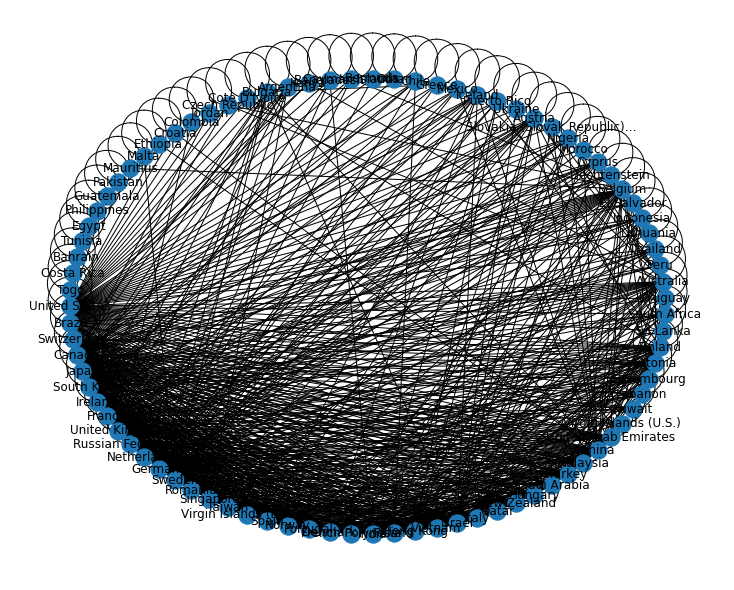

In [206]:
figure(figsize=(10, 8))
nx.draw_shell(G, with_labels=True)

In [208]:
leaderboard = {}
for x in G.nodes:
    leaderboard[x] = len(G[x])
s = pd.Series(leaderboard, name='connections')
df2 = s.to_frame().sort_values('connections', ascending=False)
df2

,connections
United States,78
Germany,60
Japan,55
Canada,51
United Kingdom,50
...,...
Pakistan,1
Philippines,1
Tunisia,1
Costa Rica,1


In [192]:


rcParams['figure.figsize'] = 14, 10
pos = nx.spring_layout(G, scale=100, k=20/np.sqrt(G.order()))
d = dict(G.degree)
nx.draw(G, pos, node_color='lightblue', 
        with_labels=True, 
        nodelist=d, 
        width = edgewidth,
        node_size=[d[k]*300 for k in d])

{'United States': Text(-4.872768595722198, -14.942717885719421, 'United States'),
 'Brazil': Text(50.36944979712487, 6.8013817098668685, 'Brazil'),
 'Switzerland': Text(-5.9763593194527385, -29.960416550122943, 'Switzerland'),
 'Canada': Text(13.416605815231652, -27.70448711611246, 'Canada'),
 'Japan': Text(8.531053528150617, 23.73321632502906, 'Japan'),
 'South Korea': Text(-52.76569771656572, 3.606098609977431, 'South Korea'),
 'Ireland': Text(27.84276974193485, 44.8099798391233, 'Ireland'),
 'France': Text(-15.563196301260009, 5.351914016555351, 'France'),
 'United Kingdom': Text(-12.197182003819838, -8.25281094175918, 'United Kingdom'),
 'Russian Federation': Text(-58.68541575993877, 72.22496193183842, 'Russian Federation'),
 'Netherlands': Text(-25.04983348622254, 15.077665758065677, 'Netherlands'),
 'Germany': Text(-21.73677241065586, -8.203397470828977, 'Germany'),
 'Sweden': Text(7.976051044158145, 2.5046817151535117, 'Sweden'),
 'Romania': Text(-89.26515194446034, 15.648526100

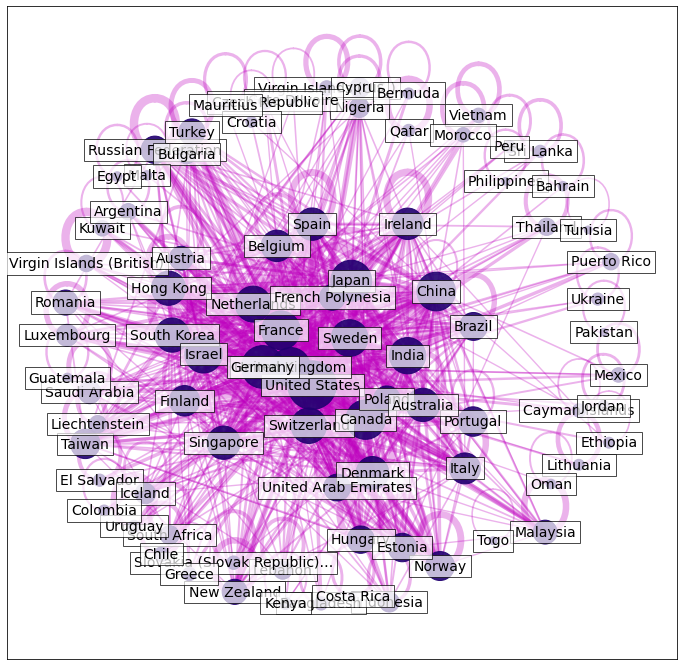

In [213]:
pos = nx.spring_layout(G, scale=100, k=20/np.sqrt(G.order()))
d = dict(G.degree)
lung = len(G.edges)
edgewidth = [list(list(G.edges(data= True))[i][2].values())[0] for i in range(0,lung-1)]
fig, ax = plt.subplots(figsize=(12, 12))
# Visualize graph components
nx.draw_networkx_edges(G, pos, alpha=0.3, width=edgewidth, edge_color="m")
nx.draw_networkx_nodes(G, pos, node_size=[d[k]*30 for k in d], node_color="#210070", alpha=0.9)
label_options = {"ec": "k", "fc": "white", "alpha": 0.7}
nx.draw_networkx_labels(G, pos, font_size=14, bbox=label_options)

In [169]:
nx.write_gexf(G, "G.gexf")

In [ ]:
plt.savefig